In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

In [7]:
ee[:7] = 0

In [8]:
ee[20:] = 0

In [9]:
ee = ee * 2.5

In [10]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [11]:
winter_max[-1]

18

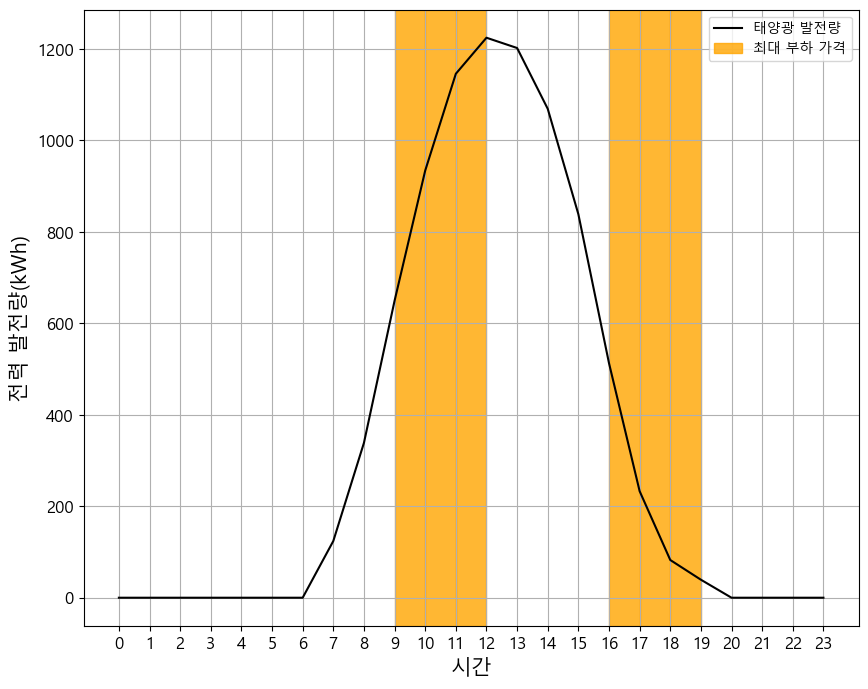

In [12]:
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k', label = '태양광 발전량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)

for i in winter_max:
    if i == winter_max[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
    else:
        plt.axvspan(i, i+1, alpha=0.8, color='orange')
plt.legend()
plt.show()

In [13]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [14]:
df.date_time = pd.to_datetime(df.date_time)

In [15]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [16]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [17]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [01:15<00:00, 1629.59it/s]


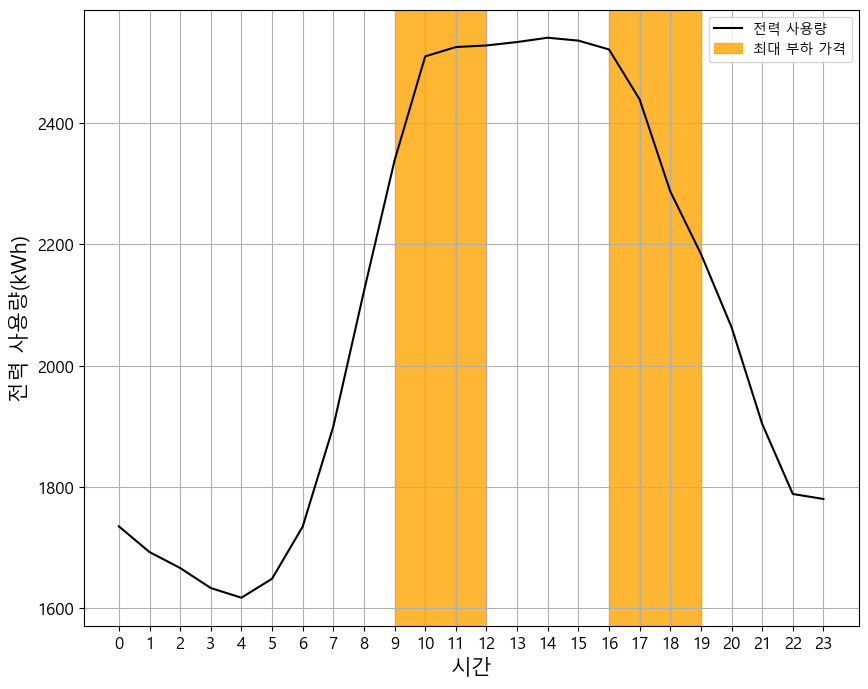

In [18]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k', label = '전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)

for i in winter_max:
    if i == winter_max[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
    else:
        plt.axvspan(i, i+1, alpha=0.8, color='orange')
plt.legend()
plt.show()

In [19]:
time = [11, 13, 14, 15, 16, 17, 18, 19]

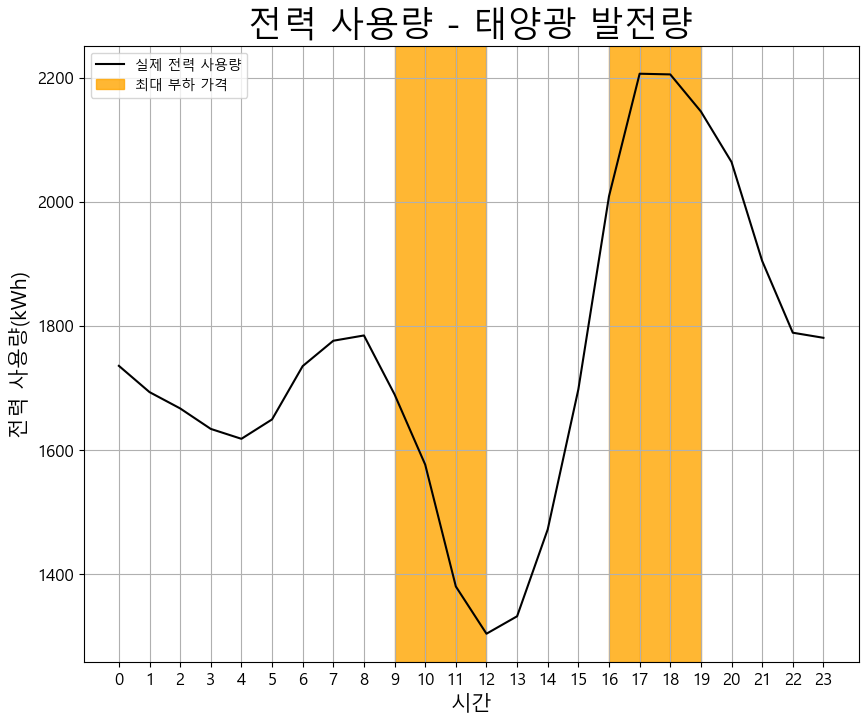

In [20]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in winter_max:
    if i == winter_max[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
    else:
        plt.axvspan(i, i+1, alpha=0.8, color='orange')
plt.title('전력 사용량 - 태양광 발전량', fontsize = 25)
plt.legend()
plt.show()

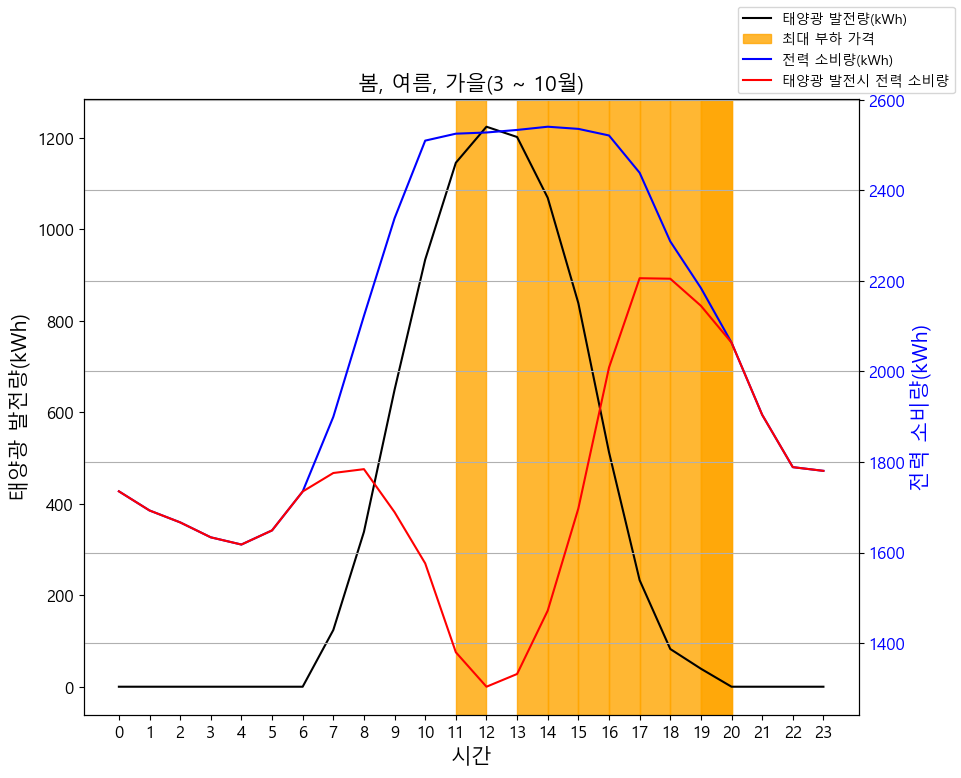

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')


for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

plt.grid(True)
fig.legend()
plt.show()

In [22]:
time2 = [9, 10, 11, 16, 17, 18, 19]

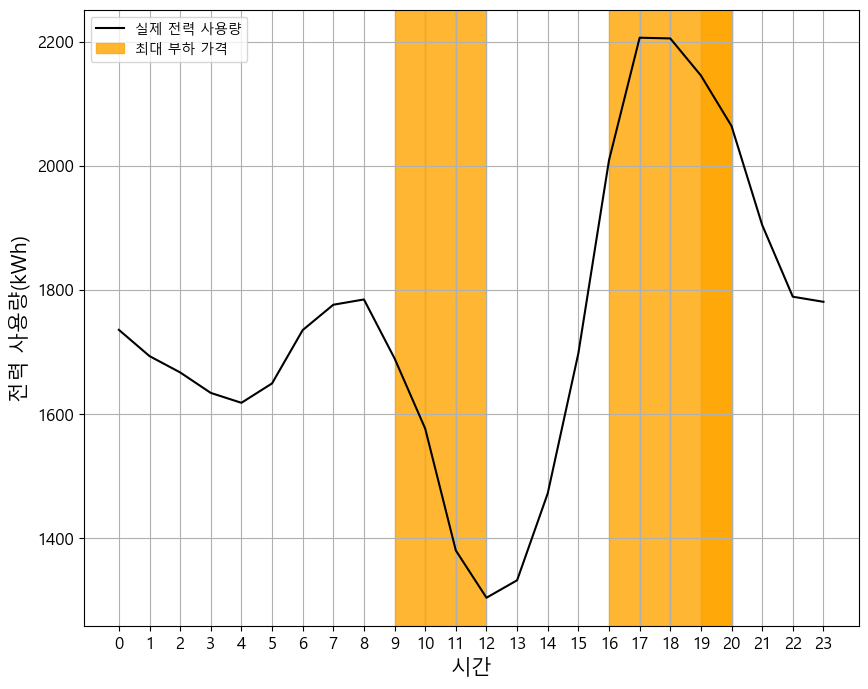

In [23]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time2:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

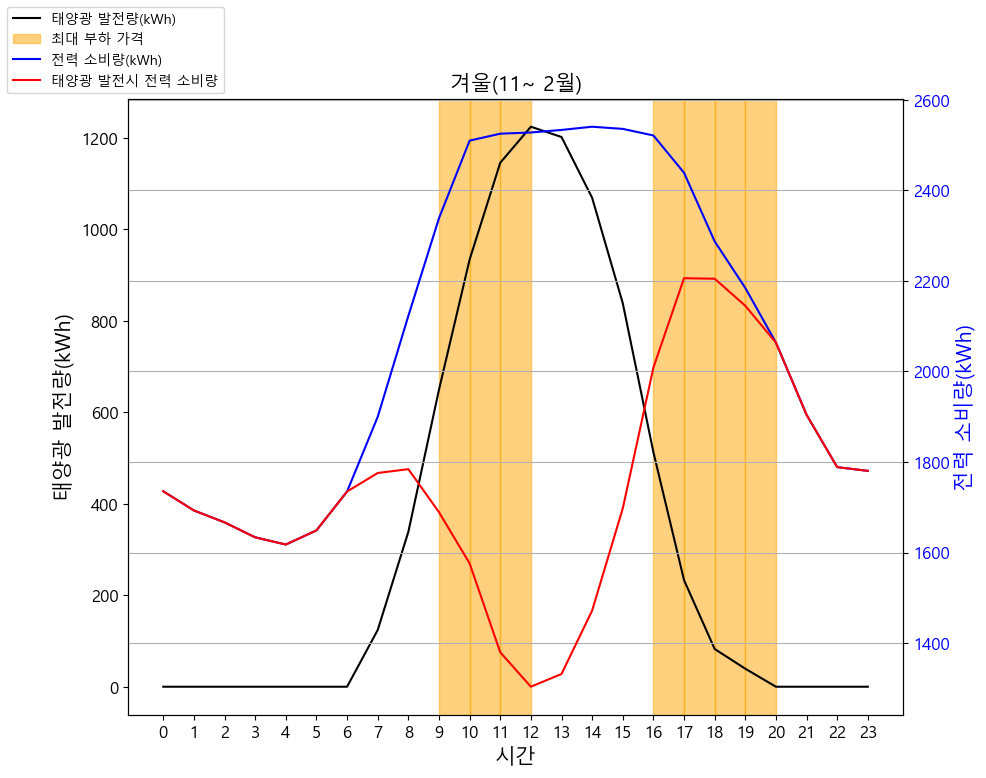

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')


fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [25]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [26]:
sell = pd.DataFrame(sell)

In [27]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


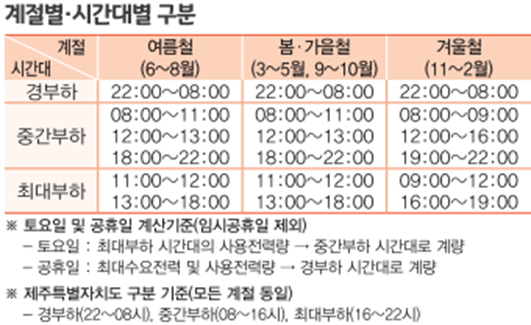

In [28]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [29]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

In [30]:
normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

In [31]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [32]:
np.dot(winter_price, (qq-ee))

5742228.589568261

In [33]:
np.dot(winter_price, qq)

7101001.773278682

In [34]:
np.dot(winter_price, qq) - np.dot(winter_price, (qq - ee))

1358773.1837104205

---
# 최적화 - 겨울

In [35]:
import pulp

In [36]:
# 시간당 전력 생산량
production = ee

# 시간당 전력 사용량
consumption = qq
# 시간당 전력 가격
price = winter_price
# 모델 생성
model = pulp.LpProblem("Power Cost Minimization", pulp.LpMinimize)

# 변수 생성
use = [pulp.LpVariable("use{}".format(i), 0) for i in range(24)]
generated_use = [pulp.LpVariable("gen_use{}".format(i), 0) for i in range(24)]

# 목적함수 생성
total_cost = pulp.lpSum([(consumption[i] - generated_use[i]) * price[i] for i in range(24)])
model += total_cost

# 제약조건 생성
for i in range(24):
    model += generated_use[i] <= production[i]
    if i > 0:
        model += generated_use[i] <= pulp.lpSum([generated_use[j] for j in range(i)])
    model += generated_use[i] <= use[i]
    model += generated_use[i] >= pulp.lpSum([generated_use[j] for j in range(i)])
    model += use[i] >= generated_use[i]
    model += use[i] <= consumption[i]
    
model += pulp.lpSum(generated_use) == pulp.lpSum(consumption)
    
# 문제 풀이
model.solve()

# 결과 출력
for i in range(24):
    print("시간 {}: 생산량 = {:.2f}, 소비량 = {:.2f}, 사용량 = {:.2f}, 발전된 전력 사용량 = {:.2f}".format(i, production[i], consumption[i], use[i].value(), generated_use[i].value()))

print("전체 요금: {:.2f}".format(pulp.value(model.objective)))


시간 0: 생산량 = 0.00, 소비량 = 1735.23, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 1: 생산량 = 0.00, 소비량 = 1692.90, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 2: 생산량 = 0.00, 소비량 = 1666.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 3: 생산량 = 0.00, 소비량 = 1633.57, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 4: 생산량 = 0.00, 소비량 = 1617.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 5: 생산량 = 0.00, 소비량 = 1648.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 6: 생산량 = 0.00, 소비량 = 1734.80, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 7: 생산량 = 124.03, 소비량 = 1899.73, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 8: 생산량 = 338.65, 소비량 = 2122.85, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 9: 생산량 = 649.47, 소비량 = 2338.62, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 10: 생산량 = 934.12, 소비량 = 2510.15, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 11: 생산량 = 1145.87, 소비량 = 2525.47, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 12: 생산량 = 1224.68, 소비량 = 2528.12, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 13: 생산량 = 1202.18, 소비량 = 2533.75, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 14: 생산량 = 1069.22, 소비량 = 2540.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 15: 생산량 = 838.69, 소비량 = 253

In [37]:
import pyswarms as ps

In [38]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour
            
            if accumulated_gen < 0:
                costs[i] = 1e30
            if gen_hour > accumulated_gen:
                costs[i] = 1e30

        costs[i] = total_cost

    return costs


# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

2023-06-05 16:06:07,240 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.51e+6
2023-06-05 16:06:12,991 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5513279.880441163, best pos: [ 893.02179609  607.31293866  590.18124718  651.85579768  305.6336987
 1581.90766584 1024.23180834  733.86605038  990.03754978  743.18700581
 1356.40307902 1117.10764824   63.27740035  141.56248032   35.55168421
  112.6657304  1460.95398633  575.61459867 1324.06308062 1576.55782403
  374.20439588 1242.53990973 1247.14903075 1271.5132705 ]


In [39]:
ee_2 = round(ee, 2)

In [40]:
qq_2 = round(qq,2)

In [41]:
# 변수와 데이터 정의
power_generation = ee_2 # 시간당 태양광 발전량 리스트
power_usage = qq_2 # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            #gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            gen_used = x[i, hour]
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour # obj

            if (accumulated_gen < 0) | (gen_used < 0) :
                total_cost = 1e30
            
            if gen_used > usage_hour:
                total_cost = 1e30
            
            if gen_used > accumulated_gen:
                total_cost = 1e30
                
        if accumulated_gen < 0:
            total_cost = 1e30
            
        costs[i] = total_cost

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.7, 'c2': 1, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=2000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used

2023-06-05 16:06:13,056 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.7, 'c2': 1, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=1e+30
2023-06-05 16:06:22,577 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1e+30, best pos: [1620.94236888 1296.49464086  476.40706574 1589.2781498   788.40961598
  457.87993127  553.25903007 1624.80369038   93.53429861 2318.31408704
 2255.39121537 1106.97935456 1461.38782189 2279.06159876  630.8124443
 1221.79635617 1029.33298606 1719.66566788 1882.67219988 1160.81175579
  443.94223689 1143.75275927 1340.96181603  289.6432071 ]


Minimum cost: 1e+30
Power usage schedule: [1620.94236888 1296.49464086  476.40706574 1589.2781498   788.40961598
  457.87993127  553.25903007 1624.80369038   93.53429861 2318.31408704
 2255.39121537 1106.97935456 1461.38782189 2279.06159876  630.8124443
 1221.79635617 1029.33298606 1719.66566788 1882.67219988 1160.81175579
  443.94223689 1143.75275927 1340.96181603  289.6432071 ]


In [42]:
total_cost = 0
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    price_hour = power_price[hour]

    accumulated_gen += gen_hour
    #gen_used = min(accumulated_gen, usage_hour, x[i, hour])
    gen_used = ee[hour]
    accumulated_gen -= gen_used

    total_cost += (usage_hour - gen_used) * price_hour # obj

In [43]:
total_cost

5742226.81228958

In [44]:
power_generation = ee_2 # 시간당 태양광 발전량 리스트
power_usage = qq_2 # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)
    cumsum_gen = 0

    for i in range(n_particles):
        total_cost = 0
        gen_hour = power_generation
        usage_hour = power_usage
        price_hour = power_price
        
        # 제약 조건
        constraints = np.zeros(72)  # 24개의 제약 조건

        for hour in range(24):
            constraints[hour] = usage_hour[hour] - gen_hour[hour] # 사용량 - 발전량
            constraints[24 + hour] =  np.sum(usage_hour[:hour+1]) - np.sum(x[i, :hour+1]) # 누적 사용량 - 누적 발전량
            constraints[48 + hour] = np.sum(x[i, : hour+1]) - np.sum(gen_hour[ : hour+1]) # 사용량 - 전력 사용량
            
        if np.any(constraints < 0):
            costs[i] = 1e30
        else:
            for hour in range(24):
                cumsum_gen += gen_hour[hour]
                cumsum_gen -= x[i, hour]
                
                if cumsum_gen < 0:
                    costs[i] = 1e30
                    
                if sum(x[i]) > sum(ee_2):
                    costs[i] = 1e30

                cost = (usage_hour[hour] - x[i, hour]) * price_hour[hour]
                total_cost += cost

            costs[i] = total_cost

    return costs


# PSO 알고리즘 설정
options = {'c1': 0.7, 'c2': 1, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

2023-06-05 16:06:22,674 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.7, 'c2': 1, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1.77e+6
2023-06-05 16:10:27,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1767262.9525684947, best pos: [1569.03648679 1339.15734422  541.5022919  1253.38285362 1595.4611736
  988.89271356 1364.82452511  817.59308834 1020.4398382  1496.32386557
 2493.17648328 2356.06455831 1345.48567858  443.5        2352.28956091
 2509.29535578 1783.97120165 2432.32398603 1474.08940498 1730.7525977
 1713.71307107 1817.33535508 1213.96557337 1287.42073418]


Minimum cost: 1767262.9525684947
Power usage schedule: [1569.03648679 1339.15734422  541.5022919  1253.38285362 1595.4611736
  988.89271356 1364.82452511  817.59308834 1020.4398382  1496.32386557
 2493.17648328 2356.06455831 1345.48567858  443.5        2352.28956091
 2509.29535578 1783.97120165 2432.32398603 1474.08940498 1730.7525977
 1713.71307107 1817.33535508 1213.96557337 1287.42073418]


In [45]:
sum(ee_2)

8394.79

In [46]:
sum(pos)

36939.99774183896

In [47]:
np.dot((qq-ee), winter_price)

5742228.589568261

In [48]:
np.dot((qq-hourly_gen_used), winter_price)


5727193.205589093

In [49]:
ee_cusum = ee.cumsum()

In [50]:
sum(ee_2), sum(pos)

(8394.79, 36939.99774183896)

In [51]:
# 적합성 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0
        total_gen_used = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            gen_used = min(usage_hour - accumulated_gen, gen_hour, x[i, hour])
            gen_used = max(0, gen_used)
            accumulated_gen += gen_used
            total_gen_used += gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

        if np.sum(power_generation) != total_gen_used:
            costs[i] += 1e6

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.1, 'c2': 0.3, 'w': 1.5}

lb = [0]*24  # E(x)의 하한
epsilon = 1e-8  # 작은 양수
ub = ee_2.cumsum()
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

bounds = (lb, ub)
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=2000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    gen_used = max(0, gen_used)
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used


2023-06-05 16:10:27,260 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=7.61e+6
2023-06-05 16:10:40,534 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7605558.375516285, best pos: [5.54464224e-09 9.72973750e-09 4.22645342e-09 7.62495174e-09
 7.56903808e-09 8.87158892e-09 6.88798595e-09 4.38446860e-01
 1.97312038e+00 5.33528687e+02 9.74329534e+02 3.19196322e+03
 1.47708091e+03 1.49200000e+03 5.81247257e+03 5.08858665e+03
 4.33742423e+03 4.52933456e+03 3.95171807e+03 5.87702972e+03
 2.81536269e+03 2.84064205e+03 1.76819384e+03 7.66816430e+03]


Minimum cost: 7605558.375516285
Power usage schedule: [5.54464224e-09 9.72973750e-09 4.22645342e-09 7.62495174e-09
 7.56903808e-09 8.87158892e-09 6.88798595e-09 4.38446860e-01
 1.97312038e+00 5.33528687e+02 9.74329534e+02 3.19196322e+03
 1.47708091e+03 1.49200000e+03 5.81247257e+03 5.08858665e+03
 4.33742423e+03 4.52933456e+03 3.95171807e+03 5.87702972e+03
 2.81536269e+03 2.84064205e+03 1.76819384e+03 7.66816430e+03]


In [52]:
pos.sum()

52360.24259171683

In [53]:
hourly_gen_used.sum()

8394.79

In [54]:
ee.sum()

8394.804900710611

In [55]:
qq.sum()

50235.2573172077

In [56]:
print(f"Minimum cost: {cost}")

print(f"Hourly generated power usage: {hourly_gen_used}")

print(f"Power usage schedule: {pos}")

Minimum cost: 7605558.375516285
Hourly generated power usage: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.38446860e-01
 1.97312038e+00 5.33528687e+02 9.74329534e+02 1.68187021e+03
 1.22468000e+03 1.20218000e+03 1.06922000e+03 8.38690000e+02
 5.12950000e+02 2.33040000e+02 8.25200000e+01 3.93700000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Power usage schedule: [5.54464224e-09 9.72973750e-09 4.22645342e-09 7.62495174e-09
 7.56903808e-09 8.87158892e-09 6.88798595e-09 4.38446860e-01
 1.97312038e+00 5.33528687e+02 9.74329534e+02 3.19196322e+03
 1.47708091e+03 1.49200000e+03 5.81247257e+03 5.08858665e+03
 4.33742423e+03 4.52933456e+03 3.95171807e+03 5.87702972e+03
 2.81536269e+03 2.84064205e+03 1.76819384e+03 7.66816430e+03]


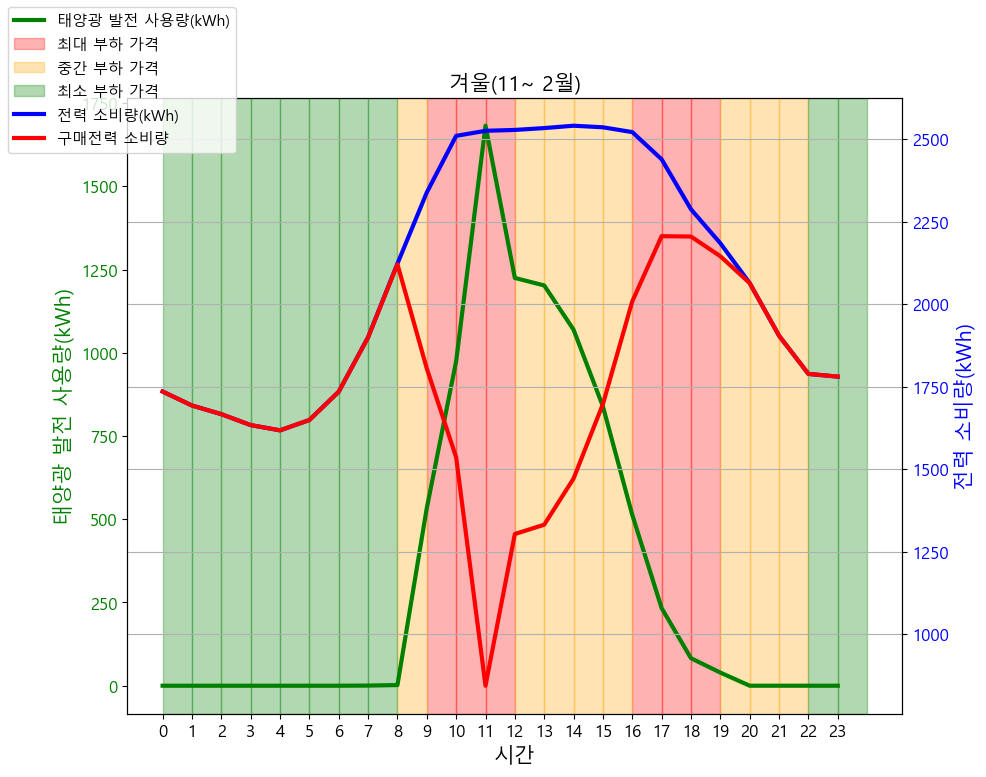

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='green', fontsize=15)
ax1.plot(hourly_gen_used, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used, color='r', label='구매전력 소비량', linewidth = 3)

for i in winter_max:
    if i == winter_max[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='red', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='red')
    
for i in winter_mid:
    if i == winter_mid[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange', label='중간 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange')

for i in winter_min:
    if i == winter_min[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='green', label='최소 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='green')



fig.legend(loc='upper left',  fontsize = 11)
plt.grid(True)
plt.show()


In [58]:
import random
from deap import base, creator, tools, algorithms

In [59]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(individual):
    total_cost = 0
    accumulated_gen = 0

    for hour in range(24):
        gen_hour = power_generation[hour]
        usage_hour = power_usage[hour]
        price_hour = power_price[hour]

        accumulated_gen += gen_hour
        gen_used = min(accumulated_gen, usage_hour, individual[hour])
        accumulated_gen -= gen_used

        total_cost += (usage_hour - gen_used) * price_hour

    return total_cost,

# 유전 알고리즘 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=24)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", minimize_cost)

# 최적화 실행
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Avg", np.mean)
stats.register("Std", np.std)
stats.register("Min", np.min)
stats.register("Max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3000, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
best_cost = minimize_cost(best_individual)


gen	nevals	Avg        	Std    	Min        	Max        
0  	50    	7.09974e+06	162.972	7.09939e+06	7.10003e+06
1  	26    	7.09958e+06	156.15 	7.09915e+06	7.09981e+06
2  	35    	7.09945e+06	177.018	7.09894e+06	7.1e+06    
3  	32    	7.09935e+06	126.406	7.09897e+06	7.09967e+06
4  	29    	7.09926e+06	182.42 	7.09878e+06	7.09989e+06
5  	17    	7.09914e+06	154.427	7.09875e+06	7.0994e+06 
6  	35    	7.09901e+06	209.488	7.09858e+06	7.09954e+06
7  	31    	7.09881e+06	209.266	7.09845e+06	7.09927e+06
8  	28    	7.09865e+06	162.967	7.09812e+06	7.09908e+06
9  	31    	7.09851e+06	206.749	7.0979e+06 	7.09902e+06
10 	31    	7.09832e+06	257.645	7.09779e+06	7.09906e+06
11 	30    	7.09811e+06	232.991	7.09757e+06	7.09855e+06
12 	25    	7.09792e+06	268.045	7.09722e+06	7.09874e+06
13 	29    	7.09772e+06	303.003	7.09711e+06	7.0984e+06 
14 	28    	7.09744e+06	303.885	7.09657e+06	7.09807e+06
15 	31    	7.09718e+06	340.065	7.09642e+06	7.09796e+06
16 	33    	7.09694e+06	240.349	7.09647e+06	7.09731e+06
17 	39    

print(f"Minimum cost: {best_cost[0]}")
print(f"Power usage schedule: {best_individual}")

In [60]:
from scipy.optimize import linprog

In [61]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 계수 정의
c = np.hstack((power_price, np.zeros(24)))

# 제약 조건 정의
A_eq = []
b_eq = []

# 발전된 전력 사용량은 현재 시간까지 발전된 양만 사용할 수 있음
for i in range(24):
    A_eq.append([0] * i + [1] * (24 - i) + [-1 if j == i else 0 for j in range(24)])
    b_eq.append(power_generation[i])

# 하루에 발전된 전력은 모두 사용해야 함
A_eq.append([0]*24 + [-1]*24)
b_eq.append(-sum(power_generation))

# 전력 사용량과 전력 발전량, 전력 가격은 고정이지만, 발전된 전력 사용량은 어느 시간에 사용할지는 정할 수 있음
bounds = [(0, usage) for usage in power_usage] + [(0, None) for _ in range(24)]

# 선형 계획법 실행
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# 결과 출력
if res.success:
    minimum_cost = res.fun
    power_usage_schedule = res.x[:24]

    print(f"Minimum cost: {minimum_cost}")
    print(f"Power usage schedule: {power_usage_schedule}")
else:
    print("Optimization failed. Please check the constraints and data.")


Optimization failed. Please check the constraints and data.


---
# 최적화 - 봄, 가을

In [62]:
np.dot(normal_price, qq-ee)

4482914.645611405

In [63]:
# 변수와 데이터 정의
power_generation_normal = ee # 시간당 태양광 발전량 리스트
power_usage_normal = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price_normal = normal_price # 시간당 전력 가격 리스트

# PSO 알고리즘 설정
options_normal = {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
bounds_normal = (np.zeros(24), np.array(power_usage_normal))
optimizer_normal = ps.single.GlobalBestPSO(n_particles=25, dimensions=24, options=options_normal, bounds=bounds_normal)

def minimize_cost_normal(x):
    n_particles_normal = x.shape[0]
    costs_normal = np.zeros(n_particles_normal)

    for i in range(n_particles_normal):
        total_cost_normal = 0
        accumulated_gen_normal = 0

        for hour in range(24):
            gen_hour_normal = power_generation_normal[hour]
            usage_hour_normal = power_usage_normal[hour]
            price_hour_normal = power_price_normal[hour]

            accumulated_gen_normal += gen_hour_normal
            gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, x[i, hour])
            accumulated_gen_normal -= gen_used_normal

            total_cost_normal += (usage_hour_normal - gen_used_normal) * price_hour_normal

        costs_normal[i] = total_cost_normal

    return costs_normal

# 최적화 실행
cost_normal, pos_normal = optimizer_normal.optimize(minimize_cost_normal, iters=2000)

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen_normal = 0
hourly_gen_used_normal = np.zeros(24)
for hour in range(24):
    gen_hour_normal = power_generation_normal[hour]
    usage_hour_normal = power_usage_normal[hour]
    accumulated_gen_normal += gen_hour_normal
    gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, pos_normal[hour])
    accumulated_gen_normal -= gen_used_normal
    hourly_gen_used_normal[hour] = gen_used_normal

2023-06-05 16:10:49,814 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=4.4e+6
2023-06-05 16:10:55,056 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4398371.860810057, best pos: [ 337.95258781  587.75669841 1577.695862    406.34543391  682.79484032
 1455.98636984 1295.72785832  963.73508557   35.486021    165.95354778
   45.63240691  248.50838465  146.01418363 1998.85030936  574.95047066
 1400.22624362 2508.89271961 1872.28789728  411.44809133  707.18698043
 1591.66017945  959.29305938 1702.02726127 1484.72155837]


In [64]:
print(f"Minimum cost: {cost_normal}")

print(f"Hourly generated power usage: {hourly_gen_used_normal}")

print(f"Power usage schedule: {pos_normal}")

Minimum cost: 4398371.860810057
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.          124.03086265   35.486021    165.95354778
   45.63240691  248.50838465  146.01418363 1998.85030936  574.95047066
 1400.22624362 2508.89271961 1024.36739439   82.51842252   39.37393395
    0.            0.            0.            0.        ]
Power usage schedule: [ 337.95258781  587.75669841 1577.695862    406.34543391  682.79484032
 1455.98636984 1295.72785832  963.73508557   35.486021    165.95354778
   45.63240691  248.50838465  146.01418363 1998.85030936  574.95047066
 1400.22624362 2508.89271961 1872.28789728  411.44809133  707.18698043
 1591.66017945  959.29305938 1702.02726127 1484.72155837]


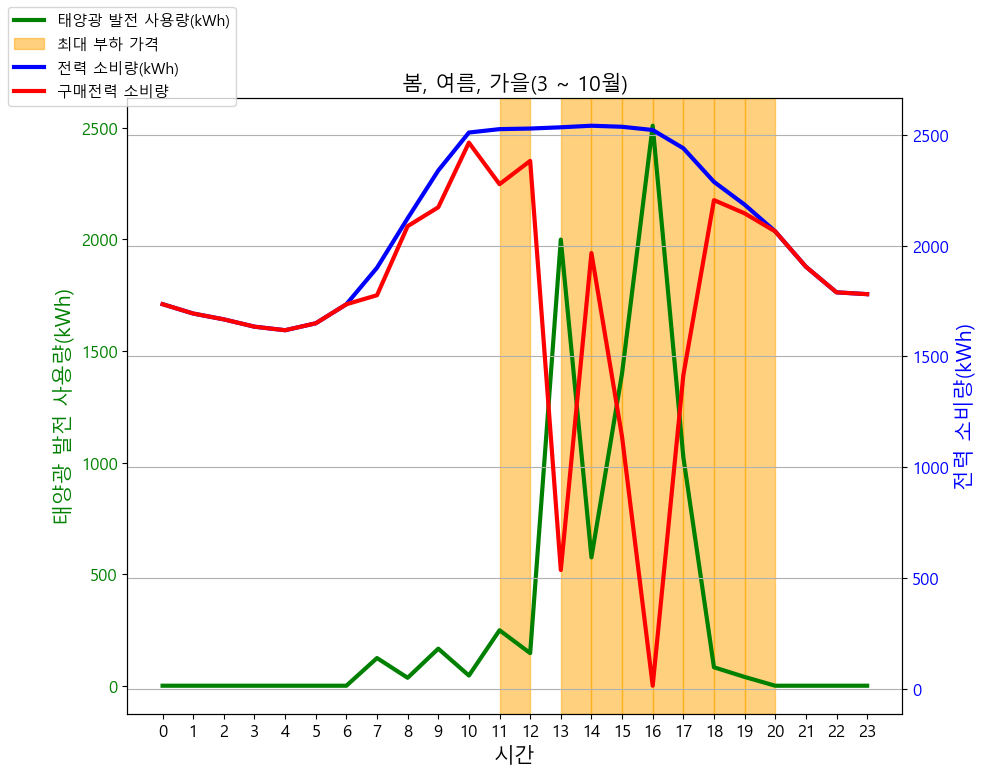

In [65]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='g', fontsize=15)
ax1.plot(hourly_gen_used_normal, color='g', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='g', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used_normal, color='r', label='구매전력 소비량', linewidth = 3)

for i in time:
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left', fontsize = 11)
plt.grid(True)
plt.show()


pd.DataFrame([ee, qq, hourly_gen_used_normal, pos_normal, qq-hourly_gen_used_normal, np.array(winter_price), np.array(normal_price), np.array(summer_price)], 
             index=['실제 발전량','실제 전력 사용량','발전 사용량', '구매 사용량', '구매전력 소비량', '겨울 전력 가격', '봄 가을 전력 가격', '여름 전력 가격']).T.to_csv('total_info.csv', index=True, encoding='cp949')

from pyomo.environ import *

def minimize_cost(power_generation, power_usage, power_price):
    model = ConcreteModel()

    hours = range(24)

    # 변수: 각 시간대별 태양광 발전량
    model.x = Var(hours, within=NonNegativeReals)

    # 제약 조건
    model.constraints = ConstraintList()

    # 각 시간대별로 태양광 발전량이 전력 사용량을 초과하지 않아야 함
    for hour in hours:
        model.constraints.add(expr=model.x[hour] <= min(power_generation[hour], power_usage[hour]))
    
    # 태양광 발전량의 총합이 전체 전력 사용량을 초과할 수 없음
    model.constraints.add(expr=sum(model.x[hour] for hour in hours) <= sum(power_usage[hour] for hour in hours))

    # 목적 함수: 전력 가격과 전력 사용량의 차이를 최소화
    model.cost = Objective(expr=sum((power_usage[hour] - model.x[hour]) * power_price[hour] for hour in hours))

    # Solver 설정 및 최적화
    solver = SolverFactory('cbc')
    solver.solve(model)

    # 결과 출력
    optimal_generation = [value(model.x[hour]) for hour in hours]
    optimal_cost = value(model.cost)

    return optimal_generation, optimal_cost

# 예시 사용
power_generation = ee  # 시간당 태양광 발전량 리스트
power_usage = qq  # 시간당 전력 사용량 리스트
power_price = winter_price  # 시간당 전력 가격 리스트

n_particles = 10  # 파티클 개수
optimal_costs = minimize_cost(power_generation, power_usage, power_price)
print(optimal_costs)


In [66]:
from pyswarm import pso

def objective_function(x):
    # 여기서 x는 각 시간대에 대한 E(x)의 값들을 나타냅니다.
    g = ee_2  # g(x) 계산
    t = winter_price  # t(x) 계산
    return sum((g[i] - x[i]) * t[i] for i in range(24))

def constraint_1(x):
    # 이 제약 조건은 부등식 형태여야 하며, 비음수 값을 반환해야 합니다.
    # 그래서 이것은 f(x) - g(x) - h(x)의 합으로 표현되어야 합니다.
    f = qq_2  # f(x) 계산
    g = ee_2  # g(x) 계산
    h = winter_price  # h(x) 계산
    return sum(f[i] - g[i] - h[i] for i in range(24))

def constraint_2(x):
    # 이 제약 조건 역시 부등식 형태여야 합니다.
    h = ee_2.cumsum()  # h(x) 계산
    return sum(x[i] - h[i] for i in range(24))

lb = [0]*24  # E(x)의 하한
ub = ee_2
epsilon = 1e-8  # 작은 양수
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

# PSO 알고리즘 실행
xopt, fopt = pso(objective_function, lb, ub, f_ieqcons=constraint_2)

print("Optimal solution x:", xopt)
print("Objective function value:", fopt)


Stopping search: maximum iterations reached --> 100
However, the optimization couldn't find a feasible design. Sorry
Optimal solution x: [5.57973865e-09 8.72948071e-09 7.51034913e-09 8.64601892e-09
 7.61767500e-09 7.41667190e-09 8.80854328e-09 1.07848843e+02
 2.58874305e+02 6.36471505e+02 2.94687873e+02 1.15648452e+02
 1.78315856e+02 1.06141695e+03 5.36023452e+02 3.64404909e+02
 2.71044832e+02 1.60795100e+01 3.52703495e+01 9.01088532e+00
 9.84181812e-09 9.37644050e-09 5.03093534e-09 7.69061058e-09]
Objective function value: 1e+100


In [67]:
from pyswarm import pso

# 큰 페널티 값 설정
penalty = 1e30

def objective_function(x):
    # 여기서 x는 각 시간대에 대한 E(x)의 값들을 나타냅니다.
    g = ee_2  # g(x) 계산
    t = winter_price  # t(x) 계산

    # 초기 목적함수 계산
    obj = sum((g[i] - x[i]) * t[i] for i in range(24))

    # 제약조건 1
    f = qq_2  # f(x) 계산
    h = ee_2.cumsum()  # h(x) 계산
    constraint_1 = sum(f[i] - g[i] - h[i] for i in range(24))

    # 제약조건 2
    constraint_2 = sum(x[i] - h[i] for i in range(24))

    # 제약조건 위반에 따른 페널티 추가
    if constraint_1 < 0:
        obj += penalty * abs(constraint_1)
    if constraint_2 < 0:
        obj += penalty * abs(constraint_2)

    return obj


lb = [0]*24  # E(x)의 하한
epsilon = 1e-8  # 작은 양수
ub = ee_2.cumsum()
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

# PSO 알고리즘 실행
xopt, fopt = pso(objective_function, lb, ub)

print("Optimal solution x:", xopt)
print("Objective function value:", fopt)


Stopping search: maximum iterations reached --> 100
Optimal solution x: [5.46611864e-09 3.76686089e-09 9.70268197e-09 7.96655537e-09
 3.87797634e-09 1.00000000e-08 3.06300412e-09 2.21807404e+00
 2.51682961e+02 1.11215000e+03 2.04625041e+03 3.19214000e+03
 4.41682000e+03 5.61899907e+03 6.68818504e+03 7.52691000e+03
 8.03986000e+03 8.27290000e+03 8.35542000e+03 8.39479000e+03
 8.39479000e+03 8.39479000e+03 8.39479000e+03 8.39479000e+03]
Objective function value: 5.632275444787746e+34


In [68]:
from pyswarm import pso

# 큰 페널티 값 설정
penalty = 1e30

def objective_function(x):
    # 여기서 x는 각 시간대에 대한 E(x)의 값들을 나타냅니다.
    g = ee_2  # g(x) 계산
    t = winter_price  # t(x) 계산

    # 초기 목적함수 계산
    obj = sum((g[i] - x[i]) * t[i] for i in range(24))

    # 제약조건 1
    f = qq_2  # f(x) 계산
    h = [ee_2[:i+1].sum() - (x[i-1] if i>0 else 0) for i in range(24)]  # h(x) 계산
    constraint_1 = sum(f[i] - g[i] - h[i] for i in range(24))

    # 제약조건 2
    constraint_2 = sum(x[i] - h[i] for i in range(24))

    # 제약조건 위반에 따른 페널티 추가
    if constraint_1 < 0:
        obj += penalty * abs(constraint_1)
    if constraint_2 < 0:
        obj += penalty * abs(constraint_2)

    return obj


lb = [0]*24  # E(x)의 하한
epsilon = 1e-8  # 작은 양수
ub = ee_2
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

# PSO 알고리즘 실행
xopt, fopt = pso(objective_function, lb, ub)

print("Optimal solution x:", xopt)
print("Objective function value:", fopt)


Stopping search: Swarm best position change less than 1e-08
Optimal solution x: [3.38557323e-09 5.11505398e-09 4.21110581e-09 9.32760363e-09
 2.32649811e-09 9.77853209e-09 9.15472208e-09 1.24030000e+02
 3.38650000e+02 6.49470000e+02 9.34120000e+02 1.14587000e+03
 1.22468000e+03 1.20218000e+03 1.06922000e+03 8.38690000e+02
 5.12950000e+02 2.33040000e+02 8.25200000e+01 3.93700000e+01
 7.70320978e-09 4.80818236e-10 2.19063146e-09 0.00000000e+00]
Objective function value: 1.28635869999839e+35


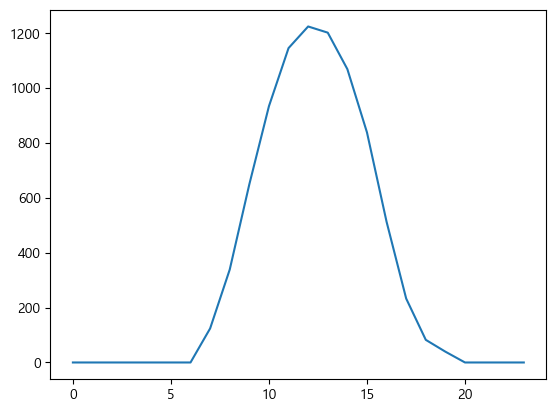

In [69]:
plt.plot(ee_2)

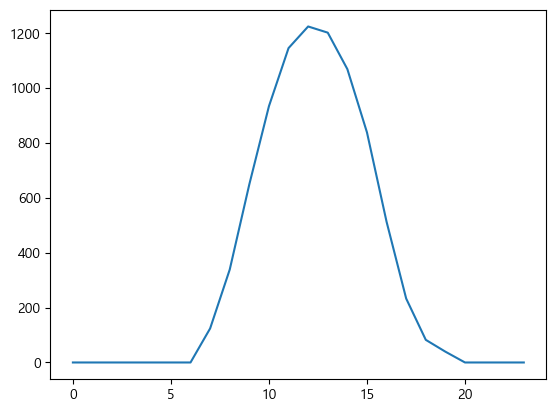

In [70]:
plt.plot(xopt)